<a href="https://colab.research.google.com/github/mushroom3969/Kaggle/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Titanic - Machine Learning from Disaster

url : https://www.kaggle.com/c/titanic/data

# Table Introduction

* survival(Survival) - 0 = No, 1 = Yes

* pclass(Ticket class) - 1 = 1st, 2 = 2nd, 3 = 3rd

  pclass: A proxy for socio-economic status (SES)
 * 1st = Upper
 * 2nd = Middle
 * 3rd = Lower
* sex(Sex)
* Age(Age) - in years

  Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* sibsp	# of siblings / spouses aboard the Titanic

   The dataset defines family relations in this way...

  Sibling = brother, sister, stepbrother, stepsister
  Spouse = husband, wife (mistresses and fiancés were ignored)

* parch	# of parents / children aboard the Titanic
  The dataset defines family relations in this way...

  Parent = mother, father
  Child = daughter, son, stepdaughter, stepson
  Some children travelled only with a nanny, therefore parch=0 for them.
* ticket	(Ticket number)
* fare	(Passenger fare)
* cabin	(Cabin number)
* embarked	(Port of Embarkation) -	C = Cherbourg, Q = Queenstown, S = Southampton




----
# Loading Data

## Download

In [4]:
from pathlib import Path
import requests

train_url = "https://raw.githubusercontent.com/mushroom3969/Kaggle/main/Titanic/titanic/train.csv"
test_url = "https://raw.githubusercontent.com/mushroom3969/Kaggle/main/Titanic/titanic/test.csv"
gender_submit_url = "https://github.com/mushroom3969/Kaggle/blob/main/Titanic/titanic/gender_submission.csv"


def download_data(url, path, filename):
  if Path(filename).is_file():
    print(f"{filename} already exist")
  else:
    req = requests.get(url)
    with open(filename, "wb") as f:
      print(f"Starting download {filename}")
      f.write(req.content)


download_data(train_url, "/content/Titanic/train.csv", "train.csv")
download_data(test_url, "/content/Titanic/test.csv", "test.csv")
download_data(gender_submit_url, "/content/Titanic/gender_submission.csv", "gender_submisson.csv")

train.csv already exist
test.csv already exist
gender_submisson.csv already exist


## Check Encoding & Size

In [5]:
import chardet
import os
import numpy as np


def check_encode_size(filename):
  line = '{:<25} {:<10} {}'.format

  # for each file, print its name, encoding & confidence in the encoding
  print(line('File Name', 'Encoding', 'Confidence'))

  for filepath in Path(filename).glob('*'):
    result = chardet.detect(filepath.read_bytes())
    print(line(str(filepath), result['encoding'], result['confidence']))
  print()
  kib = 1024
  line = '{:<25} {}'.format
  print(line('File', 'Size (KiB)'))
  for filepath in Path(filename).glob('*'):
      size = os.path.getsize(filepath)
      print(line(str(filepath), np.round(size / kib)))

check_encode_size("Titanic")

File Name                 Encoding   Confidence

File                      Size (KiB)


In [7]:
import pandas as pd

origin_df = pd.read_csv("train.csv", index_col=0)
origin_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
origin_df.shape, origin_df.columns

((891, 11),
 Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
        'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

# Data Cleaning


## Missing Data

Distribution of data only missing values compare with all

we compare with:
* Age : We **drop age first**
* cabin : There is too many category of Cabin we **drop this feature first**

No Embarked because it only has two missing data
* **drop** embarked

In [9]:
isna_df = origin_df.isna()
isna_df.sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
embark_na_df = origin_df.loc[(isna_df["Embarked"])]
age_na_df = origin_df.loc[(isna_df["Age"])]
cabin_na_df = origin_df.loc[(isna_df["Cabin"])]

Text(0.5, 1.0, 'NA_cabin')

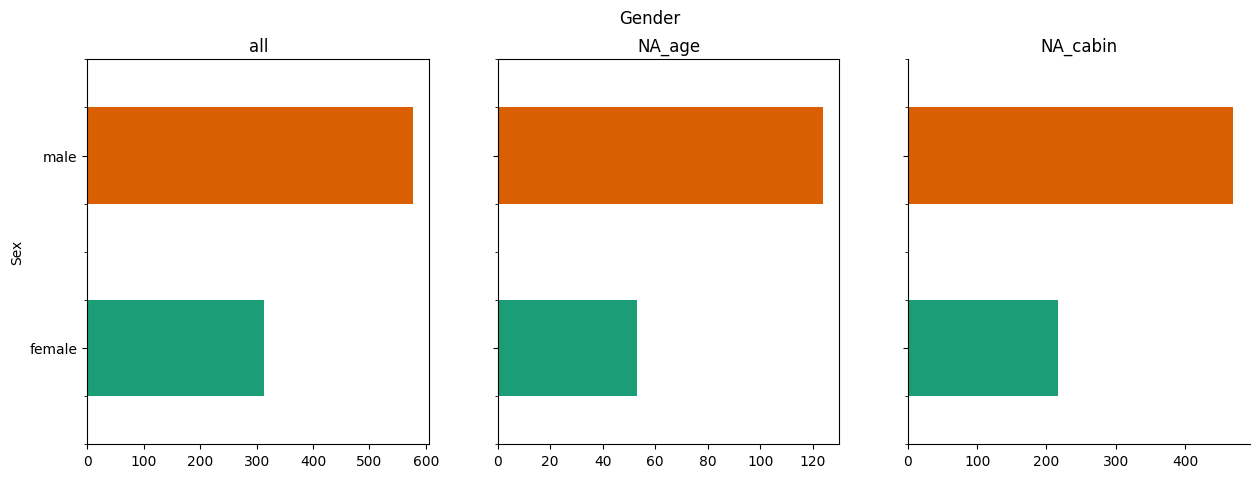

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Gender')

origin_df.groupby('Sex').size().plot(ax=axes[0], kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[0].set_title("all")

age_na_df.groupby('Sex').size().plot(ax=axes[1], kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("NA_age")

cabin_na_df.groupby('Sex').size().plot(ax=axes[2], kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[2].set_title("NA_cabin")


Text(0.5, 1.0, 'NA_cabin')

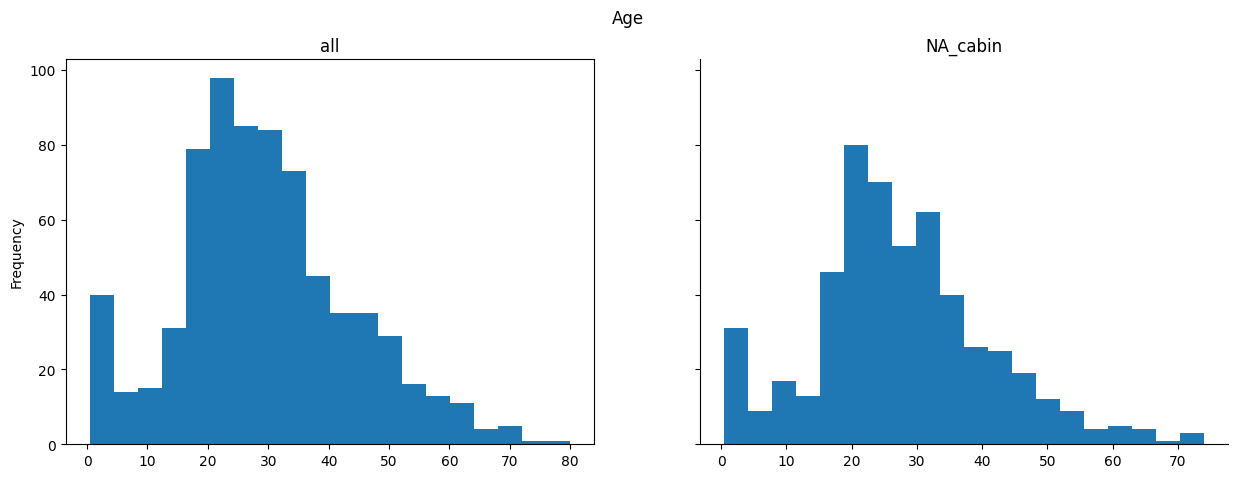

In [12]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Age')

origin_df['Age'].plot(ax=axes[0], kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[0].set_title("all")

cabin_na_df['Age'].plot(ax=axes[1], kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("NA_cabin")

Text(0.5, 1.0, 'NA_cabin')

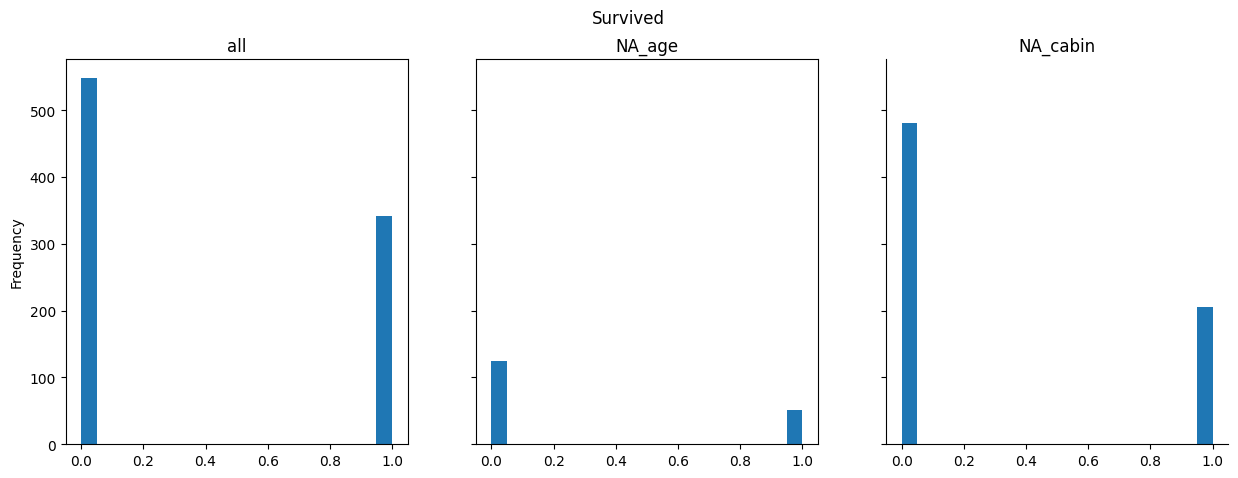

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Survived')

origin_df['Survived'].plot(ax=axes[0], kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[0].set_title("all")

age_na_df['Survived'].plot(ax=axes[1], kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("NA_age")

cabin_na_df['Survived'].plot(ax=axes[2], kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[2].set_title("NA_cabin")


Text(0.5, 1.0, 'NA_cabin')

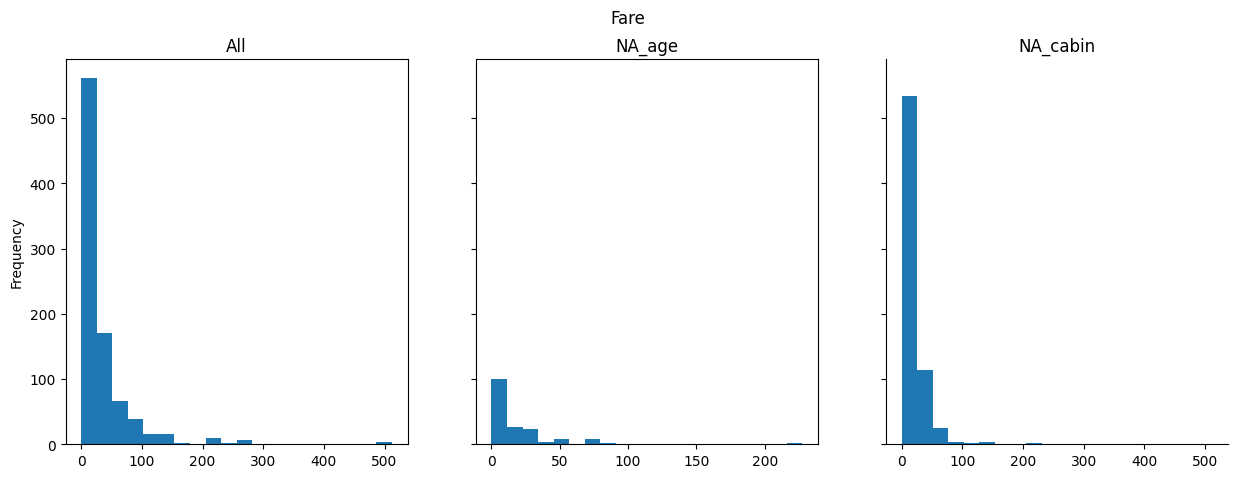

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Fare')

origin_df['Fare'].plot(ax=axes[0], kind='hist', bins=20, title='Fare')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[0].set_title("All")

age_na_df['Fare'].plot(ax=axes[1], kind='hist', bins=20, title='Fare')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("NA_age")

cabin_na_df['Fare'].plot(ax=axes[2], kind='hist', bins=20, title='Fare')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[2].set_title("NA_cabin")

Text(0.5, 1.0, 'NA_cabin')

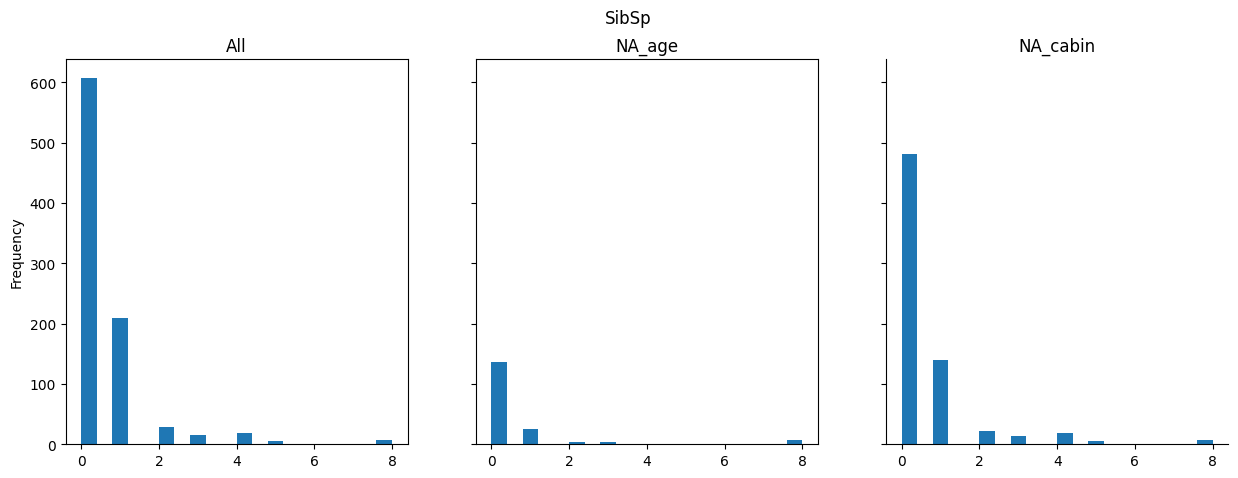

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('SibSp')

origin_df['SibSp'].plot(ax=axes[0], kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[0].set_title("All")

age_na_df['SibSp'].plot(ax=axes[1], kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("NA_age")

cabin_na_df['SibSp'].plot(ax=axes[2], kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[2].set_title("NA_cabin")

Text(0.5, 1.0, 'NA_cabin')

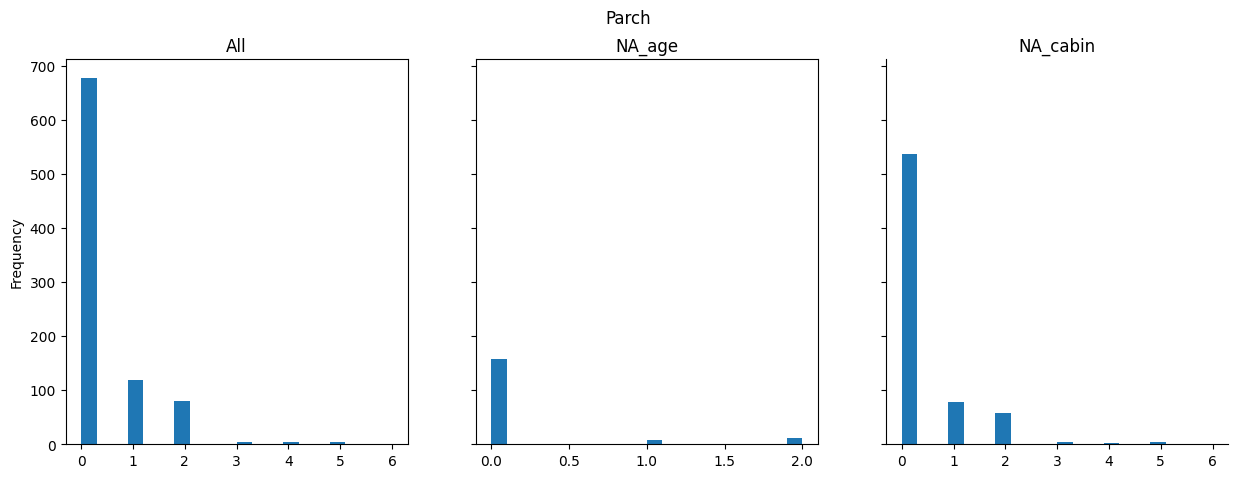

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Parch')

origin_df['Parch'].plot(ax=axes[0], kind='hist', bins=20, title='Parch')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[0].set_title("All")

age_na_df['Parch'].plot(ax=axes[1], kind='hist', bins=20, title='Parch')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("NA_age")

cabin_na_df['Parch'].plot(ax=axes[2], kind='hist', bins=20, title='Parch')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[2].set_title("NA_cabin")

## Checking Duplicate

In [17]:
sum(~origin_df.duplicated()) == origin_df.shape[0]

True

# Select Feature V1
* Survived
* Pclass
* Sex
* SibSp
* Parch
* Fare

🛑 NO `Age` `Cabin` `Embarked` `Name` `Ticket`

In [31]:
v1_feature = ["Survived",	"Pclass",	"Sex",	"SibSp",	"Parch","Fare"]

v1_df = origin_df.loc[:, v1_feature]
v1_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,male,1,0,7.2500
2,1,1,female,1,0,71.2833
3,1,3,female,0,0,7.9250
4,1,1,female,1,0,53.1000
5,0,3,male,0,0,8.0500


----

## Is there any features associate with survived?

* would survived base in scatter
 * **Female**
 * **high class**

*  would dead base in scatter
 * **high sibsp**
 * **high parch**

In [60]:
import random

def jitter(x):
  """
  jitter a vector

  arg:
  x vector which is not jitter

  return:
  a jitter's vector
  """
  return x.map(lambda x : x + random.uniform(-0.1, 0.1))

jitter_surv = jitter(v1_df.Survived)

Text(0.5, 1.0, 'Fare & Parch')

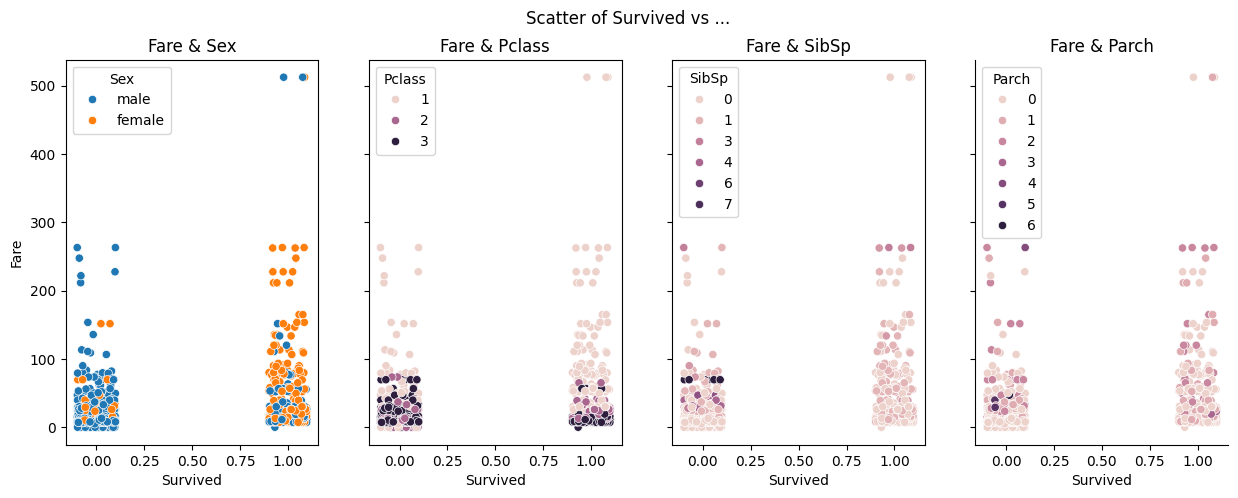

In [59]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig.suptitle('Scatter of Survived vs ...')

sns.scatterplot(ax=axes[0], data=v1_df, x=jitter_surv, y="Fare", hue="Sex",)
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[0].set_title("Fare & Sex")

sns.scatterplot(ax=axes[1], data=v1_df, x=jitter_surv, y="Fare", hue="Pclass",)
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("Fare & Pclass")

sns.scatterplot(ax=axes[2], data=v1_df, x=jitter_surv, y="Fare", hue="SibSp",)
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[2].set_title("Fare & SibSp")

sns.scatterplot(ax=axes[3], data=v1_df, x=jitter_surv, y="Fare", hue="Parch",)
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[3].set_title("Fare & Parch")

In [89]:
def group_prop(df, g):
  total = len(df)
  df["count"] = np.ones(total)
  return df.loc[:, ["Survived", g, "count"]].groupby(["Survived", g]).agg(sum) / total

### Sex

count
Survived Sex             
0        female  0.090909
         male    0.525253
1        female  0.261504
         male    0.122334

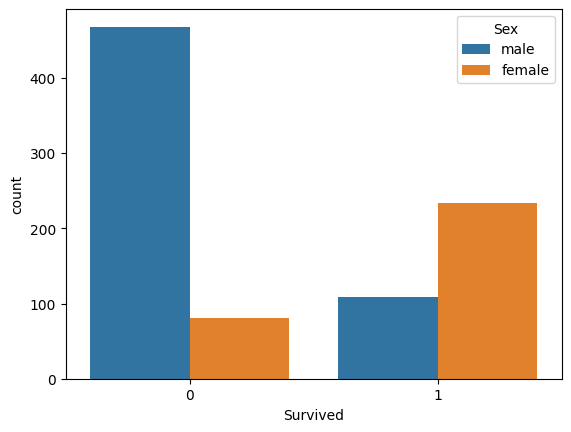

In [108]:
import plotly.express as px

sns.countplot(data=v1_df, x="Survived", hue="Sex")
group_prop(v1_df, "Sex")


### Pclass

count
Survived Pclass          
0        1       0.089787
         2       0.108866
         3       0.417508
1        1       0.152637
         2       0.097643
         3       0.133558

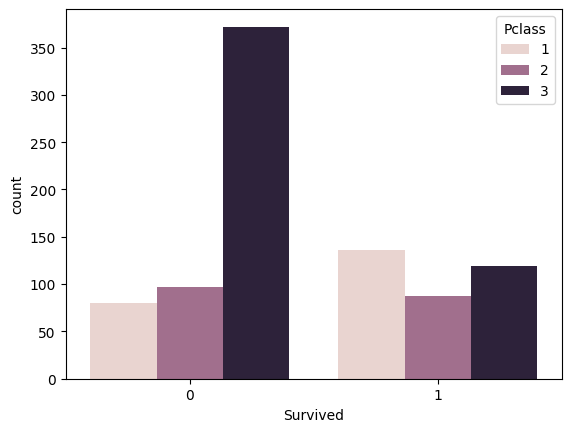

In [105]:
sns.countplot(data=v1_df, x="Survived", hue="Pclass")
group_prop(v1_df, "Pclass")

### Sibsp

count
Survived SibSp          
0        0      0.446689
         1      0.108866
         2      0.016835
         3      0.013468
         4      0.016835
         5      0.005612
         8      0.007856
1        0      0.235690
         1      0.125701
         2      0.014590
         3      0.004489
         4      0.003367

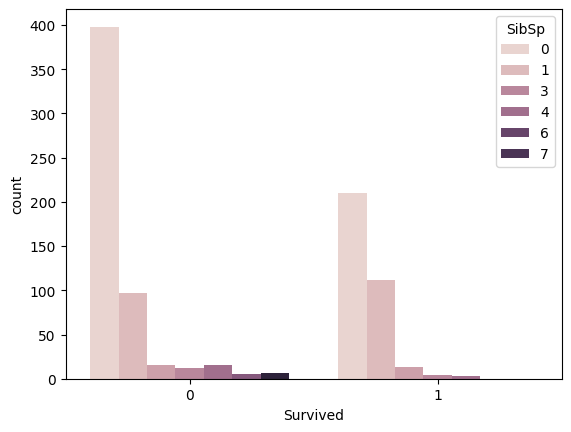

In [106]:
sns.countplot(data=v1_df, x="Survived", hue="SibSp")
group_prop(v1_df, "SibSp")

### Parch

count
Survived Parch          
0        0      0.499439
         1      0.059484
         2      0.044893
         3      0.002245
         4      0.004489
         5      0.004489
         6      0.001122
1        0      0.261504
         1      0.072952
         2      0.044893
         3      0.003367
         5      0.001122

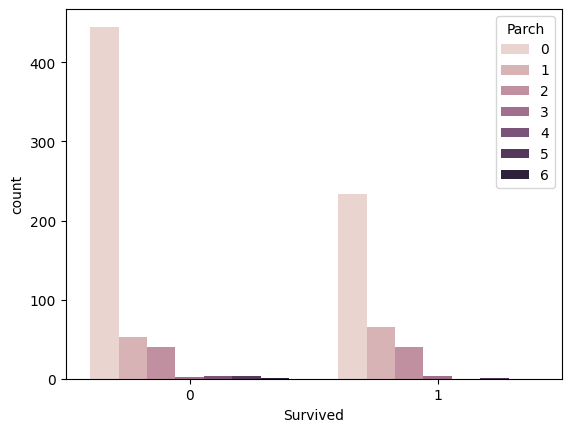

In [109]:
sns.countplot(data=v1_df, x="Survived", hue="Parch")
group_prop(v1_df, "Parch")

In [28]:
X_train, y_train = v1_df.iloc[:, 1:], v1_df.iloc[:, 0]